# 蠟燭線回測
### 初始資料拿取

In [1]:
import numpy as np
import pandas as pd
from talib import abstract
from finlab.data import Data

%matplotlib inline

data = Data()

signal = data.talib('CDLTRISTAR')

close = data.get_adj('收盤價')
open_ = data.get_adj('開盤價')

### 計算買入時間

In [10]:
sids = close.columns[:10]    # sid = stockId。列出前十個股票代號欄位

signal = signal[sids]
close = close[sids]
open_ = open_[sids]
open_

stock_id         0051       0052       0053       0054       0055       0056  \
date                                                                           
2007-04-23  32.900000  38.050000        NaN        NaN        NaN        NaN   
2007-04-24  32.830000  38.400000        NaN        NaN        NaN        NaN   
2007-04-25  32.810000  38.500000        NaN        NaN        NaN        NaN   
2007-04-26  32.900000  38.700000        NaN        NaN        NaN        NaN   
2007-04-27  32.800000  38.600000        NaN        NaN        NaN        NaN   
2007-04-30  32.720000  38.850000        NaN        NaN        NaN        NaN   
2007-05-02  32.070000  38.360000        NaN        NaN        NaN        NaN   
2007-05-03  32.200000  38.500000        NaN        NaN        NaN        NaN   
2007-05-04  32.000000  38.920000        NaN        NaN        NaN        NaN   
2007-05-07  32.500000  39.310000        NaN        NaN        NaN        NaN   
2007-05-08  32.600000  39.450000        NaN        NaN        NaN        NaN   
2007-05-09  32.650000  39.890000        NaN        NaN        NaN        NaN   
2007-05-10  32.500000  39.620000        NaN        NaN        NaN        NaN   
2007-05-11  32.500000  39.410000        NaN        NaN        NaN        NaN   
2007-05-14  32.550000  39.350000        NaN        NaN        NaN        NaN   
2007-05-15  32.430000  39.370000        NaN        NaN        NaN        NaN   
2007-05-16  32.400000  38.900000        NaN        NaN        NaN        NaN   
2007-05-17  32.350000  38.600000        NaN        NaN        NaN        NaN   
2007-05-18  32.450000  39.060000        NaN        NaN        NaN        NaN   
2007-05-21  32.420000  39.200000        NaN        NaN        NaN        NaN   
2007-05-22  32.650000  39.550000        NaN        NaN        NaN        NaN   
2007-05-23  32.900000  40.000000        NaN        NaN        NaN        NaN   
2007-05-24  33.010000  40.200000        NaN        NaN        NaN        NaN   
2007-05-25  32.840000  40.000000        NaN        NaN        NaN        NaN   
2007-05-28  32.980000  39.900000        NaN        NaN        NaN        NaN   
2007-05-29  33.000000  40.100000        NaN        NaN        NaN        NaN   
2007-05-30  32.920000  40.280000        NaN        NaN        NaN        NaN   
2007-05-31  33.000000  40.100000        NaN        NaN        NaN        NaN   
2007-06-01  33.180000  40.480000        NaN        NaN        NaN        NaN   
2007-06-04  33.300000  40.660000        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2019-06-28  46.003525  78.027523  46.428700  30.545552  23.796735  44.101040   
2019-07-01  46.574998  79.122390  47.135253  30.696903  23.966618  44.581660   
2019-07-02  46.574998  80.217258  47.678756  31.192237  23.953550  44.664526   
2019-07-03  46.574998  78.903417  47.366242  30.889533  23.783667  44.681099   
2019-07-04  46.503564  79.122390  47.474942  30.889533  23.979686  44.399356   
2019-07-05  46.632145  79.268373  47.216779  31.027126  24.005822  44.631379   
2019-07-08  46.789300  78.684444  47.284716  31.274792  24.045026  44.730818   
2019-07-09  46.589284  78.757435  47.216779  31.027126  24.045026  44.681099   
2019-07-10  46.374982  79.341364  47.352654  31.205996  24.097298  44.581660   
2019-07-11  46.817873  80.582213  48.235846  31.343589  24.175705  44.747391   
2019-07-12  47.046462  80.290249  48.099970  31.082163  24.241045  44.929695   
2019-07-15  47.075036  81.239133  48.072795  31.137200  24.280249  45.045707   
2019-07-16  47.346485  81.969045  48.684235  31.274792  24.162637  45.095426   
2019-07-17  47.589361  81.750071  48.276609  31.453663  24.175705  45.161719   
2019-07-18  47.460780  81.677080  48.167908        NaN  24.162637  44.896549   
2019-07-19  47.646508  82.406992  48.915224  31.095922  24.201841  44.962842   
2019-07-22  47.675082  83.574850  48.983162  31.109681  24.241045  44.879976   


In [ ]:
buy = (signal > 0)                           # 大於零，買進                       
sell = close < close.rolling(20).mean()      # 小於ma20均線 就賣出。
                                             # 重新用pandas.DataFrame組一個  
hold = pd.DataFrame(np.nan, index=close.index, columns=close.columns)
hold[buy] = 1                                # 買入訊號 = 1
hold[sell] = 0                               # 賣出訊號 = 0 
hold.ffill(inplace=True)                     # 將買入訊號延續到下一個。
hold.fillna(0, inplace=True)                 # not a number也要塞0
hold = hold.shift()                          #出現買入訊號之後，也要開盤價的隔天才能買入。

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
hold.plot()

### 計算報酬率

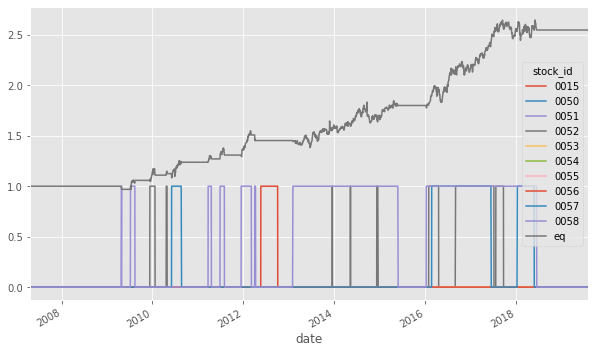

In [11]:
import matplotlib.pyplot as plt

gain = open_.shift(-1).ffill()[sids] / open_.ffill()[sids]   
eq = (gain[hold == 1].mean(axis=1)).fillna(1).cumprod()

draw_df = hold.copy()
draw_df['eq'] = eq

draw_df.plot()

### 不要每天都rebalance

2.261374504577735

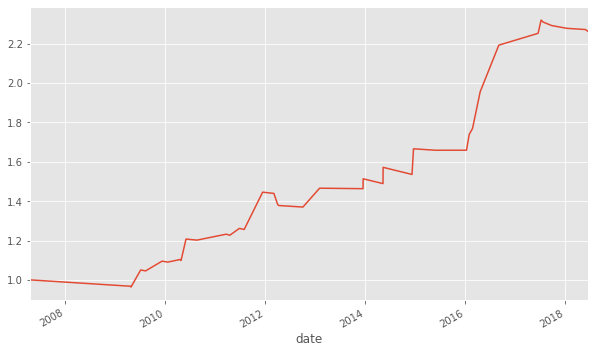

In [12]:
rebalance = (hold.diff().abs().sum(axis=1) != 0).cumsum()
rebalance_hold = hold[rebalance.diff() != 0]
rebalance_gain = gain.groupby(rebalance.values).apply(lambda s:s.cumprod().iloc[-1])
rebalance_gain.index = rebalance_hold.index

# 手續費
position_diff = rebalance_hold.div(rebalance_hold.sum(axis=1), axis=0).fillna(0).diff()
tax_ratio = position_diff.copy()
tax_ratio[tax_ratio < 0] *= (1.425/1000 + 3/1000)
tax_ratio[tax_ratio > 0] *= (1.425/1000)
tax_ratio = tax_ratio.abs().sum(axis=1)


eq2 = (rebalance_gain[rebalance_hold == 1].mean(axis=1).fillna(1) * (1 - tax_ratio)).cumprod()
eq2.plot()
eq2.iloc[-1]

## 考慮手續費

In [13]:
import pickle
pickle.dump(eq, open('return_history.pkl', 'wb'))